### Cell 1: Visualize Emotion Distribution
Generates a bar chart to visualize how many samples exist for each emotion class using Seaborn.

In [6]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.utils import resample

### Cell 2: Load Dataset
This cell reads the `Emotion_final.csv` file into a pandas DataFrame called `df`, which likely contains text data labeled with different emotions.

In [7]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')



### Cell 3: Display DataFrame
This cell displays the contents of the DataFrame `df`, giving a preview of the dataset loaded.

In [8]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


### Cell 4: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [9]:
!pip install transformers datasets scikit-learn pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

### Cell 5: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [10]:
df = df[['Text', 'Emotion']].dropna()
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Cell 6: Encode Emotion Labels
Converts emotion labels from strings to integers using `LabelEncoder`. This is needed for model training.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Emotion'])


### Cell 7: Split Dataset
Splits the dataset into training and testing sets using an 80/20 ratio. Ensures reproducibility with `random_state=42`.

In [12]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Text'].tolist(), df['label'].tolist(), test_size=0.1, random_state=42
)


### Cell 8: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Cell 9: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [14]:
import torch

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx]) for key, val in self.encodings.items()
        } | {'labels': torch.tensor(self.labels[idx])}

train_dataset = EmotionDataset(train_encodings, train_labels)
val_dataset = EmotionDataset(val_encodings, val_labels)


### Cell 10: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [15]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',  # Replace with FL-BERT checkpoint
    num_labels=len(label_encoder.classes_)
)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Cell 11: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [16]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anuragtk07 (anuragtk07-shivaji-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.128000,0.161884
2,0.165600,0.145064
3,0.118100,0.162846


TrainOutput(global_step=3624, training_loss=0.20181797820227693, metrics={'train_runtime': 1165.5265, 'train_samples_per_second': 49.711, 'train_steps_per_second': 3.109, 'total_flos': 2590448607154548.0, 'train_loss': 0.20181797820227693, 'epoch': 3.0})

### Cell 12: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [17]:
# Evaluation
trainer.evaluate()

# Make predictions
preds = trainer.predict(val_dataset)
pred_labels = preds.predictions.argmax(-1)

# Decode predictions to emotion labels
decoded_preds = label_encoder.inverse_transform(pred_labels)


### Cell 13: Classification Report
Generates a detailed report showing precision, recall, F1-score, and support for each emotion class.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# True labels
true_labels = val_labels

# Predicted labels (already computed earlier)
pred_labels = preds.predictions.argmax(-1)

# Classification report
report = classification_report(true_labels, pred_labels, target_names=label_encoder.classes_)
print("📊 Classification Report:")
print(report)


📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.96      0.93      0.95       315
        fear       0.90      0.95      0.92       276
       happy       0.98      0.93      0.95       678
        love       0.77      0.94      0.85       142
     sadness       0.97      0.97      0.97       651
    surprise       0.82      0.79      0.80        84

    accuracy                           0.94      2146
   macro avg       0.90      0.92      0.91      2146
weighted avg       0.94      0.94      0.94      2146



### Cell 14: Visualize Emotion Distribution
Generates a bar chart to visualize how many samples exist for each emotion class using Seaborn.

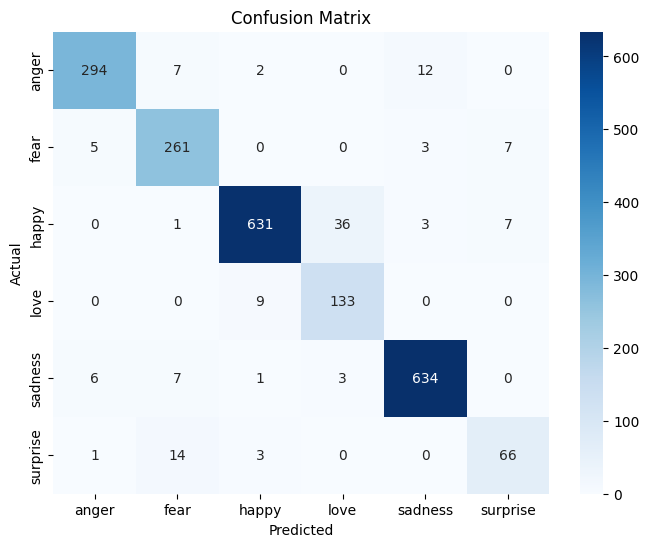

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Cell 15: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
sample_encodings = {k: v.to(device) for k, v in sample_encodings.items()}


### Cell 16: Code Execution
Executes a specific step in the preprocessing, modeling, or evaluation pipeline.

In [23]:
# Sample test sentences
sample_texts = [
    "I feel so happy and grateful today!",
    "I'm really frustrated with how things turned out.",
    "Why do I feel so anxious right now?",
    "I love spending time with my family.",
    "This is the worst day ever."
]

# Tokenize
sample_encodings = tokenizer(sample_texts, truncation=True, padding=True, return_tensors='pt')

# Send to same device as model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
sample_encodings = {k: v.to(device) for k, v in sample_encodings.items()}

# Predict
model.eval()
with torch.no_grad():
    outputs = model(**sample_encodings)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Decode predictions
predicted_emotions = label_encoder.inverse_transform(predictions.cpu().numpy())

# Show results
for text, emotion in zip(sample_texts, predicted_emotions):
    print(f"📝 Text: {text}\n🔮 Predicted Emotion: {emotion}\n")


📝 Text: I feel so happy and grateful today!
🔮 Predicted Emotion: happy

📝 Text: I'm really frustrated with how things turned out.
🔮 Predicted Emotion: anger

📝 Text: Why do I feel so anxious right now?
🔮 Predicted Emotion: fear

📝 Text: I love spending time with my family.
🔮 Predicted Emotion: love

📝 Text: This is the worst day ever.
🔮 Predicted Emotion: sadness

